In [1]:
import os

os.listdir("/kaggle/input")


['plantdisease']

In [2]:
os.listdir("/kaggle/input/plantdisease/PlantVillage")

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [3]:
import os
import pandas as pd

base_path = "/kaggle/input/plantdisease/PlantVillage"

# taking tomato classes
tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

data = []
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    data.append([cls, len(os.listdir(cls_path))])

df = pd.DataFrame(data, columns=["Class", "Number of Images"])
df

,Class,Number of Images
0,Tomato_Leaf_Mold,952
1,Tomato__Tomato_YellowLeaf__Curl_Virus,3209
2,Tomato_Bacterial_spot,2127
3,Tomato_Septoria_leaf_spot,1771
4,Tomato_healthy,1591
5,Tomato_Spider_mites_Two_spotted_spider_mite,1676
6,Tomato_Early_blight,1000
7,Tomato__Target_Spot,1404
8,Tomato_Late_blight,1909
9,Tomato__Tomato_mosaic_virus,373


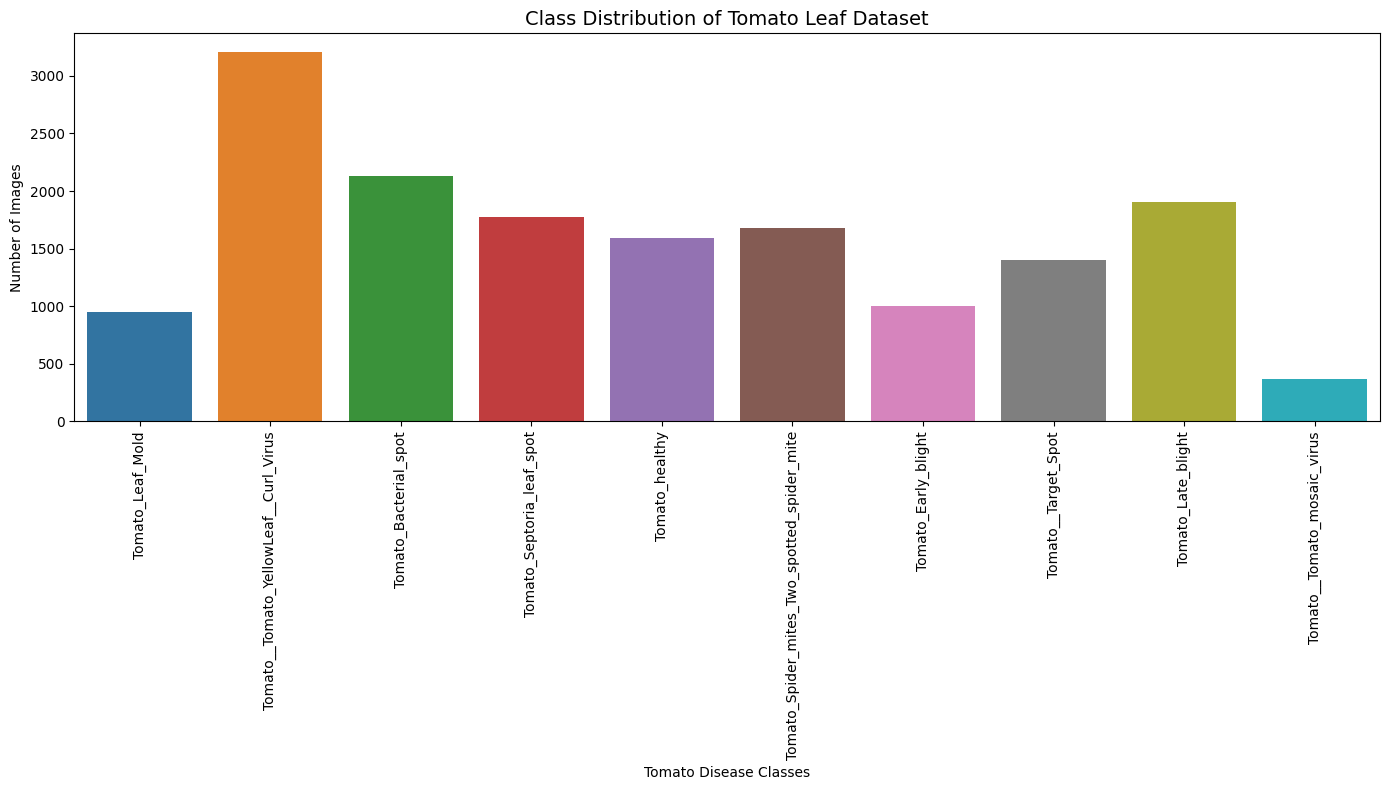

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))

sns.barplot(
    data=df,
    x="Class",
    y="Number of Images",
    hue="Class",                 
    palette="tab10",
    legend=False                 
)

plt.xticks(rotation=90)
plt.title("Class Distribution of Tomato Leaf Dataset", fontsize=14)
plt.xlabel("Tomato Disease Classes")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


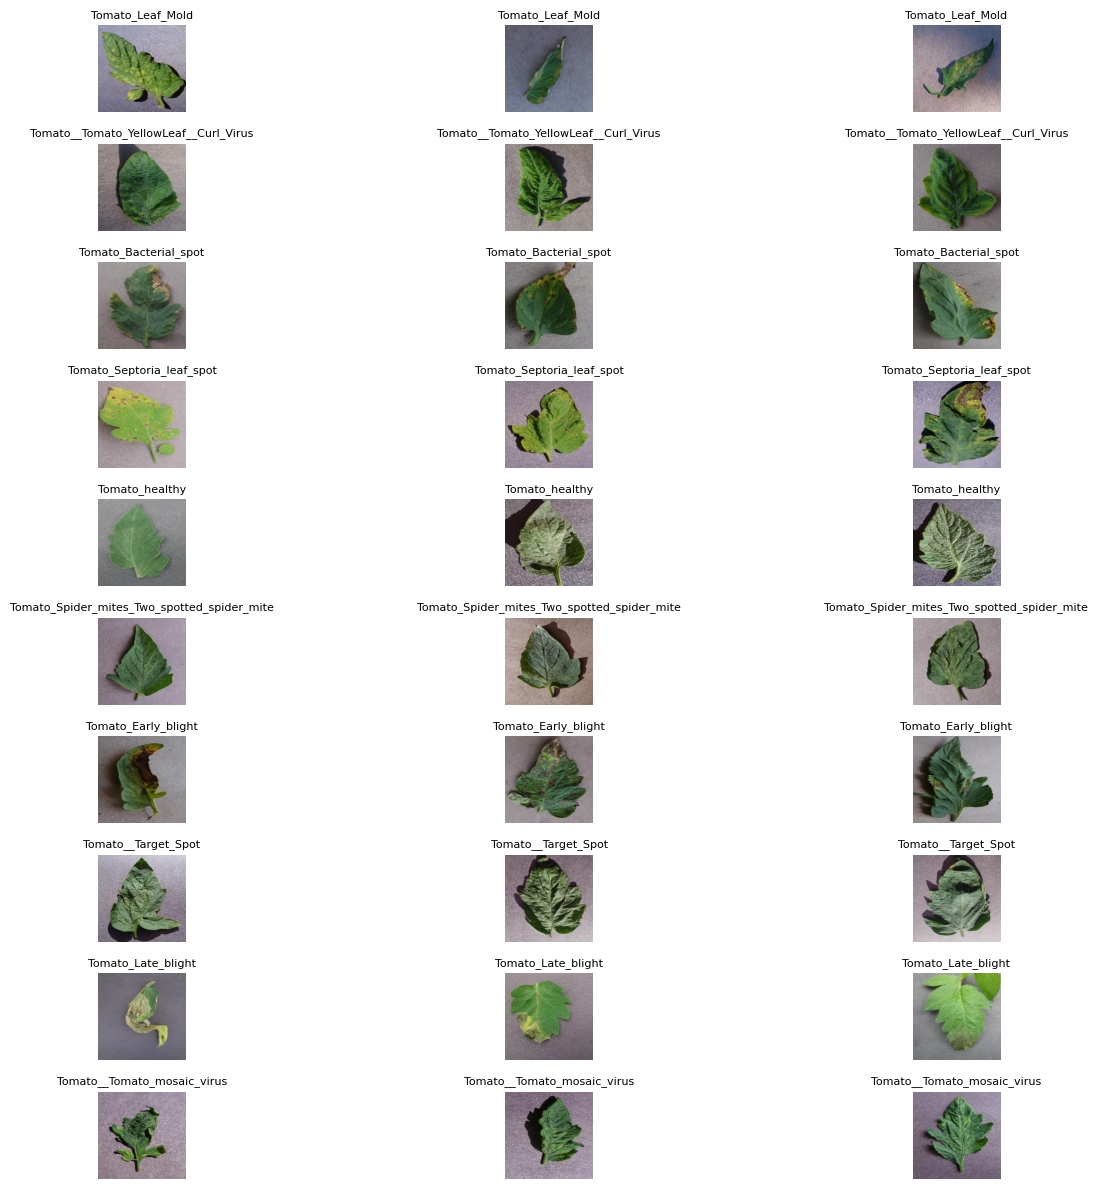

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

base_path = "/kaggle/input/plantdisease/PlantVillage"

tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

plt.figure(figsize=(15,12))

img_index = 1
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    images = os.listdir(cls_path)
    
    # we randomly select 3 images per class
    sample_images = random.sample(images, 3)
    
    for img_name in sample_images:
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        
        plt.subplot(len(tomato_classes), 3, img_index)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls, fontsize=8)
        img_index += 1

plt.tight_layout()
plt.show()

In [6]:
import os
from PIL import Image
import pandas as pd
import random

base_path = "/kaggle/input/plantdisease/PlantVillage"
tomato_classes = [c for c in os.listdir(base_path) if c.startswith("Tomato")]

sizes = []

# some sample images 
for cls in tomato_classes:
    cls_path = os.path.join(base_path, cls)
    images = random.sample(os.listdir(cls_path), 50)
    
    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        sizes.append(img.size)  # (width, height)

df_sizes = pd.DataFrame(sizes, columns=["Width", "Height"])
df_sizes.head()


,Width,Height
0,256,256
1,256,256
2,256,256
3,256,256
4,256,256


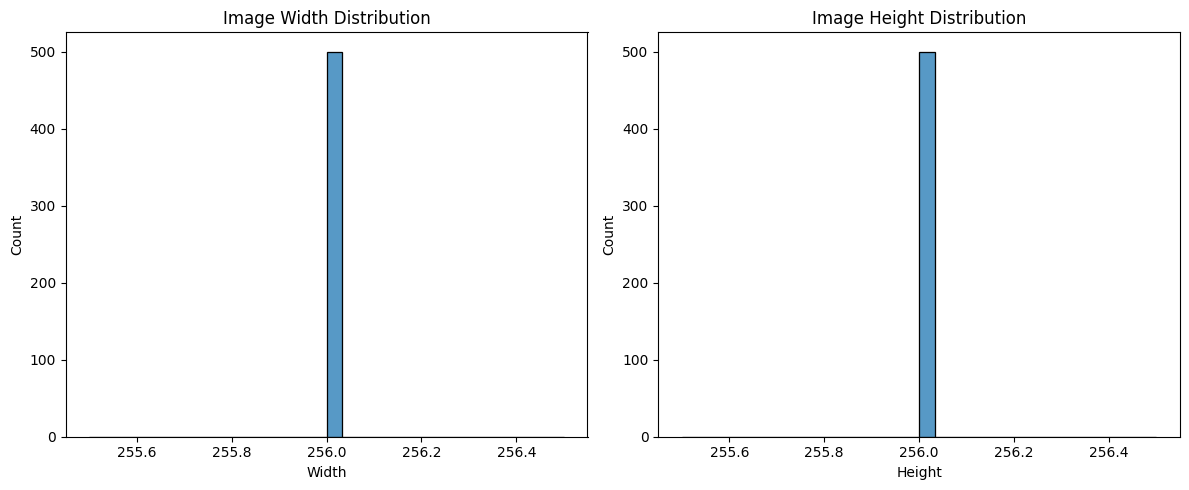

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_sizes["Width"], bins=30)
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
sns.histplot(df_sizes["Height"], bins=30)
plt.title("Image Height Distribution")

plt.tight_layout()
plt.show()

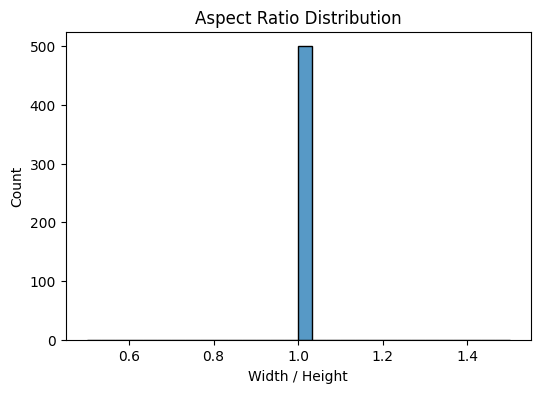

In [8]:
df_sizes["Aspect_Ratio"] = df_sizes["Width"] / df_sizes["Height"]

plt.figure(figsize=(6,4))
sns.histplot(df_sizes["Aspect_Ratio"], bins=30)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.show()

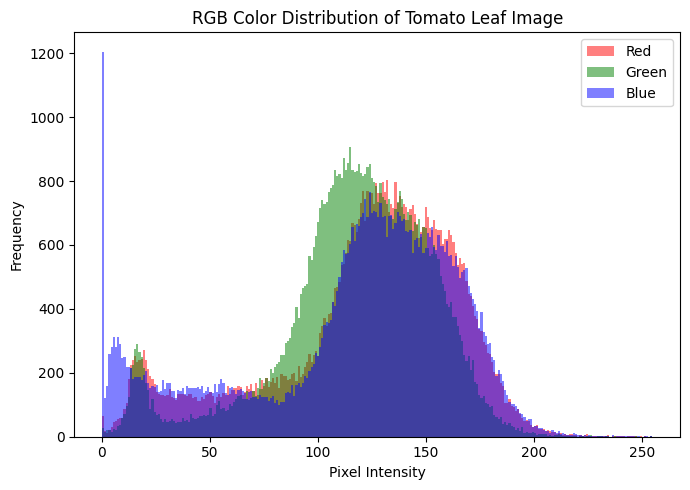

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(img_path).convert("RGB")
img_np = np.array(img)

plt.figure(figsize=(7,5))
plt.hist(img_np[:,:,0].ravel(), bins=256, alpha=0.5, label="Red", color="red")
plt.hist(img_np[:,:,1].ravel(), bins=256, alpha=0.5, label="Green", color="green")
plt.hist(img_np[:,:,2].ravel(), bins=256, alpha=0.5, label="Blue", color="blue")

plt.legend()
plt.title("RGB Color Distribution of Tomato Leaf Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


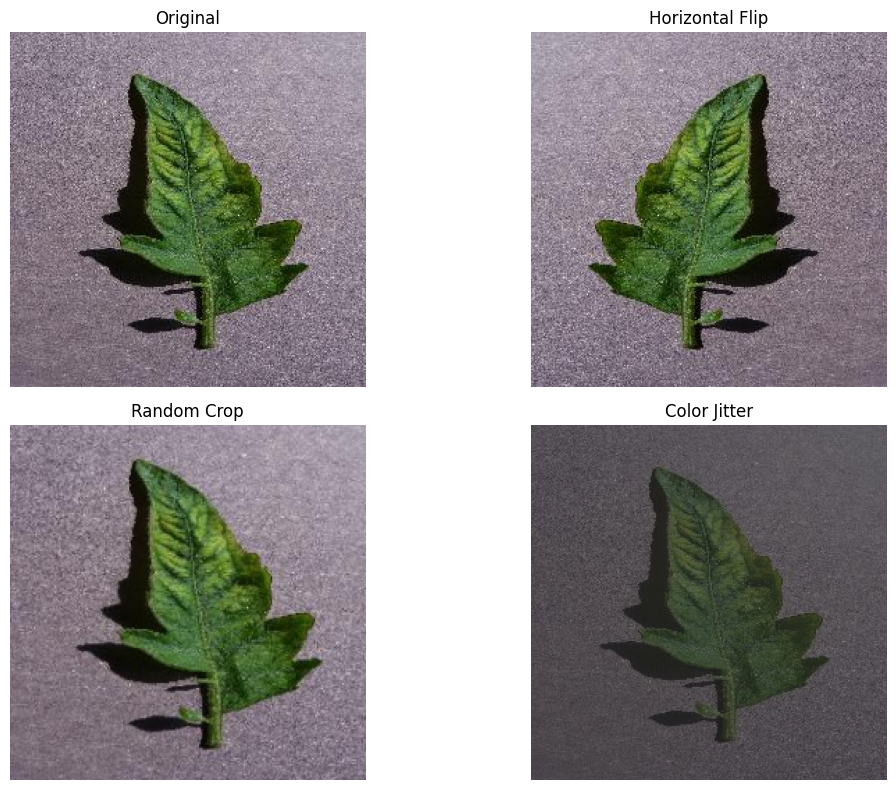

In [10]:
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Load one sample image
img = Image.open(img_path).convert("RGB")

# Define augmentations
augmentations = {
    "Original": transforms.ToTensor(),
    "Horizontal Flip": transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor()
    ]),
    "Random Crop": transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ToTensor()
    ]),
    "Color Jitter": transforms.Compose([
        transforms.ColorJitter(brightness=0.4, contrast=0.4),
        transforms.ToTensor()
    ])
}

# Plot results
plt.figure(figsize=(12,8))
for i, (title, aug) in enumerate(augmentations.items()):
    augmented_img = aug(img).permute(1,2,0)
    plt.subplot(2,2,i+1)
    plt.imshow(augmented_img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(
    root="/kaggle/working/TomatoOnly",
    transform=transform
)

train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Train:", len(train_dataset))
print("Test:", len(test_dataset))


Train: 11207
Test: 4804


In [12]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision.models import ResNet50_Weights, VGG16_Weights, EfficientNet_B0_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------- ResNet50 ----------
resnet = models.resnet50(weights=ResNet50_Weights.DEFAULT)
for param in resnet.parameters():
    param.requires_grad = False
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet = resnet.to(device)

# ---------- VGG16 ----------
vgg = models.vgg16(weights=VGG16_Weights.DEFAULT)
for param in vgg.features.parameters():
    param.requires_grad = False
vgg.classifier[6] = nn.Linear(4096, 10)
vgg = vgg.to(device)

# ---------- EfficientNet-B0 ----------
efficient = models.efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
for param in efficient.features.parameters():
    param.requires_grad = False
efficient.classifier[1] = nn.Linear(efficient.classifier[1].in_features, 10)
efficient = efficient.to(device)


In [13]:
import torch.optim as optim
import time

def train_model(model, train_loader, epochs=5, lr=1e-3):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)

    model.train()
    start_time = time.time()

    for epoch in range(epochs):
        running_loss = 0.0

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * imgs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    total_time = time.time() - start_time
    return total_time


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np

def evaluate_model(model, loader):
    model.eval()

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.numpy())
            all_preds.extend(preds.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="macro")

    return acc, f1, all_labels, all_preds



========== ResNet50 ==========
Epoch 1/5, Loss: 0.1994
Epoch 2/5, Loss: 0.1761
Epoch 3/5, Loss: 0.1553
Epoch 4/5, Loss: 0.1405
Epoch 5/5, Loss: 0.1333
Accuracy: 0.9473
Precision (macro): 0.9406
Recall (macro): 0.9390
F1-score (macro): 0.9392
AUC (macro): 0.9976
Training Time: 300.33 sec
Testing Time: 24.35 sec


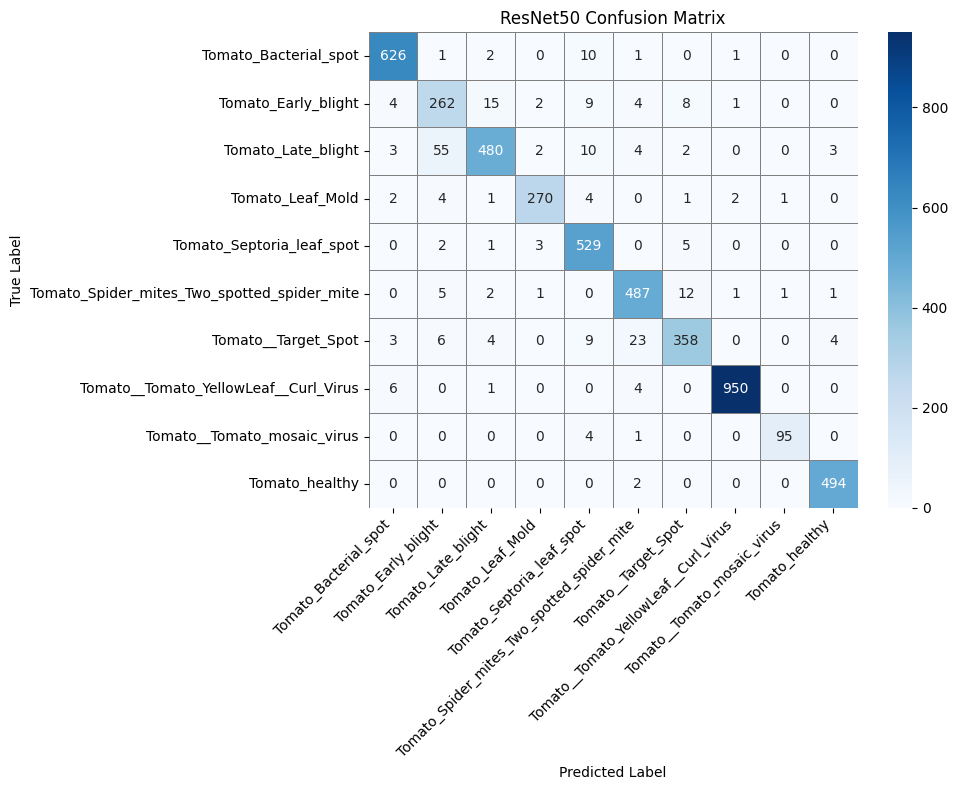

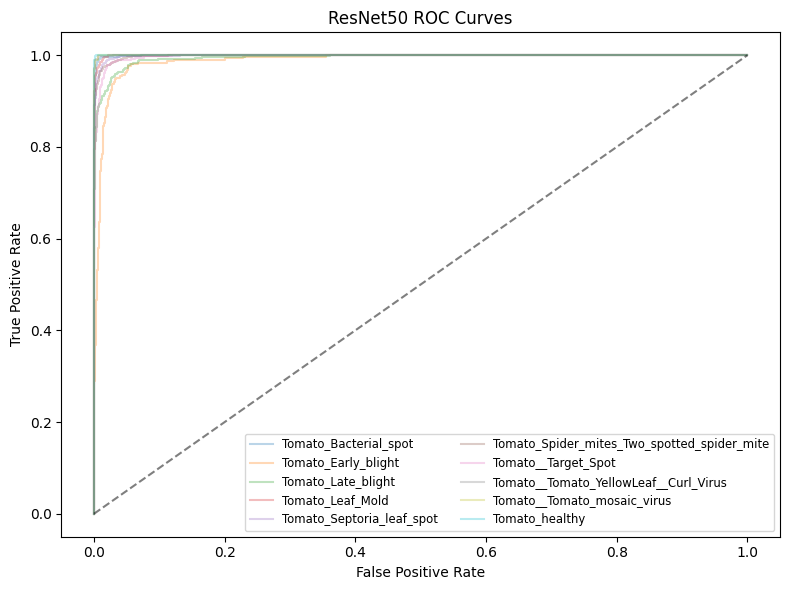


========== VGG16 ==========
Epoch 1/5, Loss: 0.5278
Epoch 2/5, Loss: 0.6017
Epoch 3/5, Loss: 0.6219
Epoch 4/5, Loss: 0.4722
Epoch 5/5, Loss: 0.4494
Accuracy: 0.9388
Precision (macro): 0.9198
Recall (macro): 0.9255
F1-score (macro): 0.9190
AUC (macro): 0.9936
Training Time: 480.92 sec
Testing Time: 35.17 sec


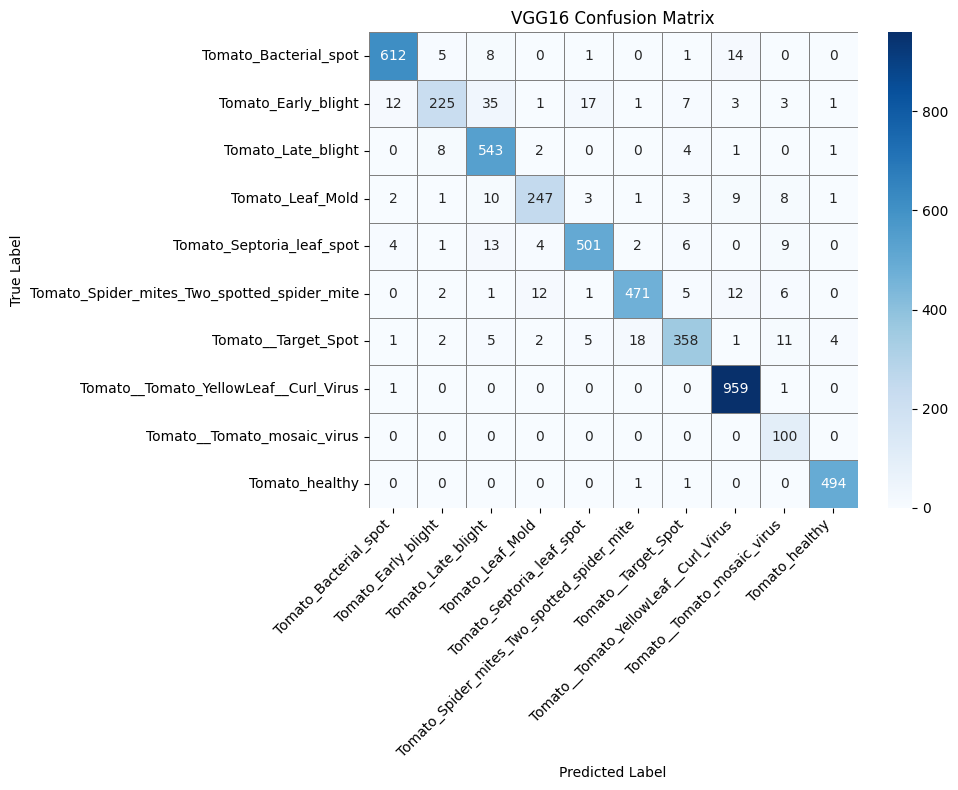

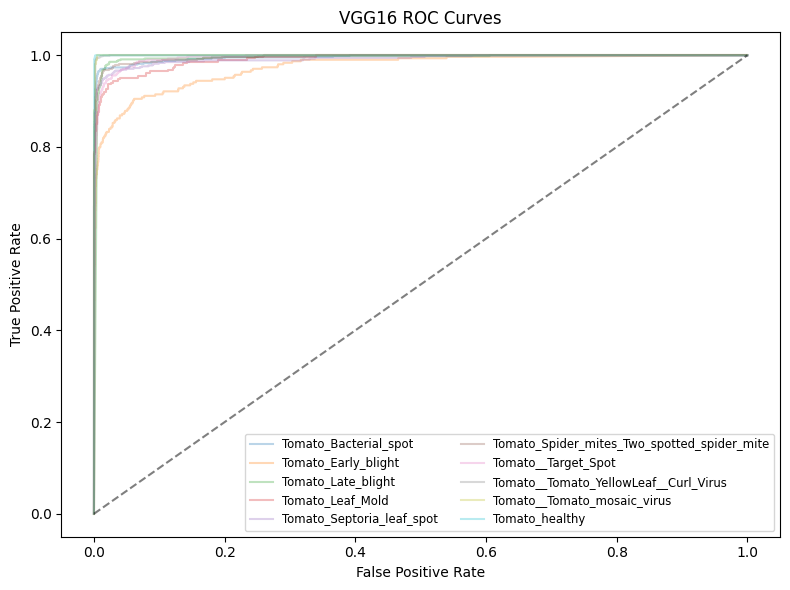


========== EfficientNet-B0 ==========
Epoch 1/5, Loss: 0.2577
Epoch 2/5, Loss: 0.2384
Epoch 3/5, Loss: 0.2302
Epoch 4/5, Loss: 0.2142
Epoch 5/5, Loss: 0.2182
Accuracy: 0.9467
Precision (macro): 0.9402
Recall (macro): 0.9383
F1-score (macro): 0.9387
AUC (macro): 0.9977
Training Time: 196.36 sec
Testing Time: 16.35 sec


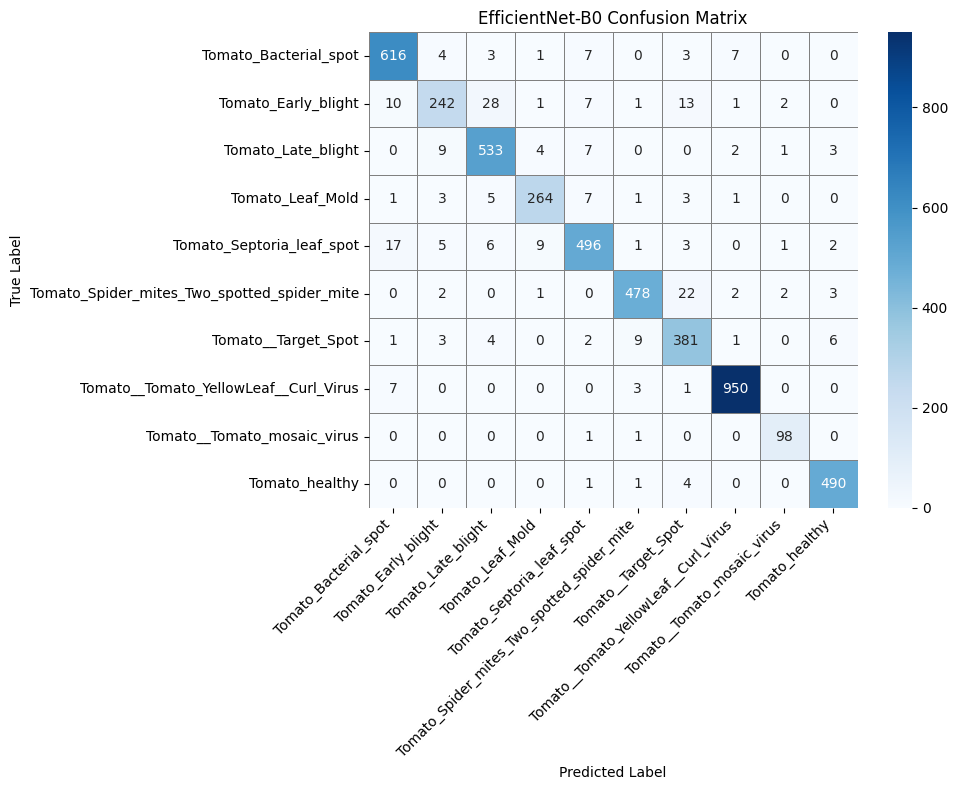

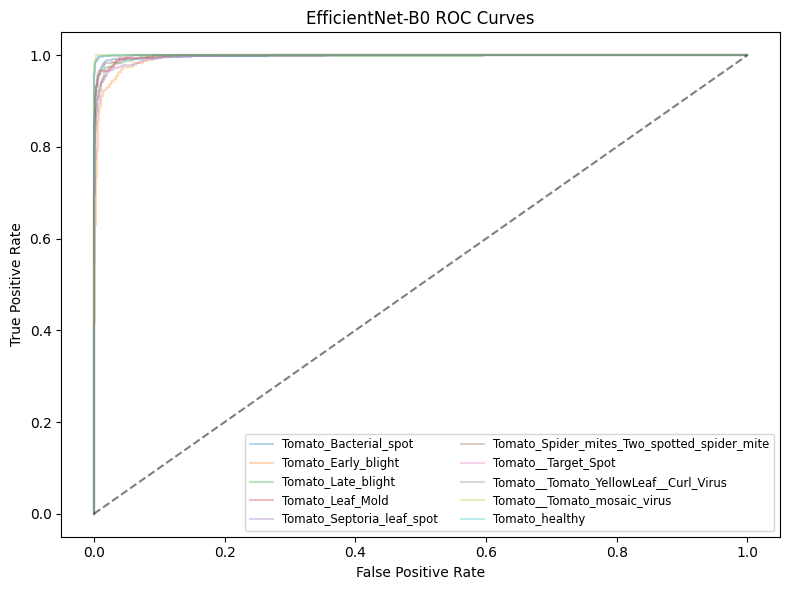


===== FINAL COMPARISON TABLE =====


,Model,Accuracy,Precision,Recall,F1-score,AUC,Train Time,Test Time
0,ResNet50,0.947336,0.940551,0.939032,0.939165,0.997592,300.330034,24.347384
2,EfficientNet-B0,0.946711,0.940228,0.938259,0.938702,0.997727,196.363632,16.346173
1,VGG16,0.938801,0.919785,0.925531,0.918990,0.993595,480.921379,35.165392



Paired t-test (ResNet50 vs EfficientNet-B0)
t-statistic: -2.285278766908229
p-value: 0.02233987275280489


In [20]:
import numpy as np
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score,
                             roc_curve)
from sklearn.preprocessing import label_binarize
from scipy.stats import ttest_rel

results = []
all_predictions = {}

num_classes = len(dataset.classes)

models_dict = {
    "ResNet50": resnet,
    "VGG16": vgg,
    "EfficientNet-B0": efficient
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for name, model in models_dict.items():

    print(f"\n========== {name} ==========")

    # Move model to device
    model = model.to(device)

    # ---- Train ----
    train_time = train_model(model, train_loader, epochs=5)

    # ---- Test ----
    start_test = time.time()

    model.eval()
    y_true = []
    y_pred = []
    y_prob = []

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            outputs = model(imgs)

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            y_true.extend(labels.numpy())
            y_pred.extend(preds.cpu().numpy())
            y_prob.extend(probs.cpu().numpy())

    test_time = time.time() - start_test

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    # ---- Metrics ----
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    cm = confusion_matrix(y_true, y_pred)
    class_accuracy = cm.diagonal() / cm.sum(axis=1)

    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    auc = roc_auc_score(y_true_bin, y_prob, average='macro', multi_class='ovr')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print(f"AUC (macro): {auc:.4f}")
    print(f"Training Time: {train_time:.2f} sec")
    print(f"Testing Time: {test_time:.2f} sec")

    # ---- Confusion Matrix ----
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,
                annot=True,        # Show numbers
                fmt='d',           # Integer format
                cmap="Blues",
                xticklabels=dataset.classes,
                yticklabels=dataset.classes,
                linewidths=0.5,
                linecolor='gray')
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # ---- ROC Curve ----
    plt.figure(figsize=(8,6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, alpha=0.3, label=f"{dataset.classes[i]}")
    plt.plot([0,1], [0,1], 'k--', alpha=0.5)
    plt.title(f"{name} ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()

    results.append([name, acc, precision, recall, f1, auc,
                    train_time, test_time])

    all_predictions[name] = (y_pred == y_true).astype(int)


# ---- Final Summary Table ----
summary_df = pd.DataFrame(results,
    columns=["Model","Accuracy","Precision","Recall",
             "F1-score","AUC","Train Time","Test Time"])

summary_df = summary_df.sort_values(by="Accuracy", ascending=False)

print("\n===== FINAL COMPARISON TABLE =====")
display(summary_df)

# ---- Paired T-Test ----
if "ResNet50" in all_predictions and "EfficientNet-B0" in all_predictions:
    t_stat, p_value = ttest_rel(
        all_predictions["ResNet50"],
        all_predictions["EfficientNet-B0"]
    )

    print("\nPaired t-test (ResNet50 vs EfficientNet-B0)")
    print("t-statistic:", t_stat)
    print("p-value:", p_value)
